<a href="https://colab.research.google.com/github/mayurraj9378/Data-Science/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [25]:
from IPython import get_ipython
from IPython.display import display
# %%
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
# %%
pima.head()
# %%
#split dataset in features and target variable
# Assuming 'pima' is your DataFrame
pima['pregnant'] = pd.to_numeric(pima['pregnant'], errors='coerce')
pima['insulin'] = pd.to_numeric(pima['insulin'], errors='coerce')
pima['bmi'] = pd.to_numeric(pima['bmi'], errors='coerce')
pima['age'] = pd.to_numeric(pima['age'], errors='coerce')  # Convert 'age' column
pima['glucose'] = pd.to_numeric(pima['glucose'], errors='coerce')  # Convert 'glucose' column
pima['bp'] = pd.to_numeric(pima['bp'], errors='coerce')  # Convert 'bp' column
pima['pedigree'] = pd.to_numeric(pima['pedigree'], errors='coerce')  # Convert 'pedigree' column

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable
# %%
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
# %%
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Create an imputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# instantiate the model (using the default parameters)
# change solver to 'liblinear' or 'saga' and adjust max_iter if needed
logreg = LogisticRegression(random_state=16, solver='liblinear', max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
# %%

In [26]:


# Import the metrics class
from sklearn import metrics

# Generate the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Display the confusion matrix (Note: this will print the matrix to the output)
print(cnf_matrix)

[[114  17]
 [ 19  43]]


Text(0.5, 427.9555555555555, 'Predicted label')

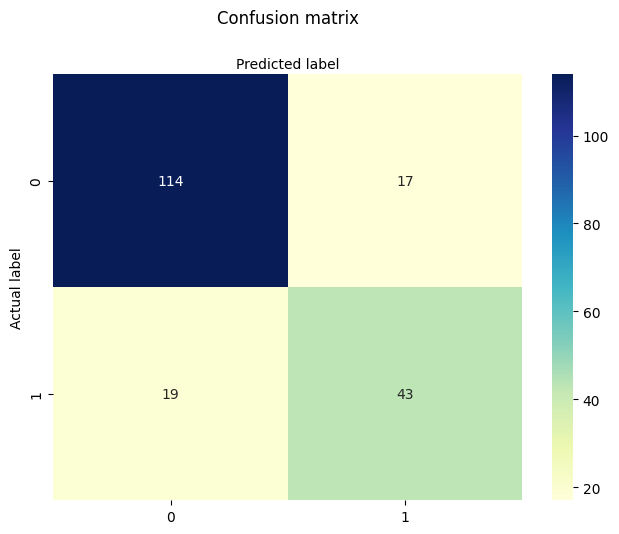

In [27]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [28]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.86      0.87      0.86       131
   with diabetes       0.72      0.69      0.70        62

        accuracy                           0.81       193
       macro avg       0.79      0.78      0.78       193
    weighted avg       0.81      0.81      0.81       193



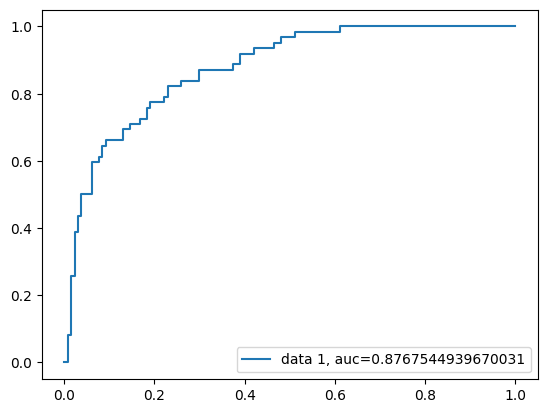

In [29]:

# Import necessary libraries (if not already imported)
import matplotlib.pyplot as plt
from sklearn import metrics

# ... (rest of your code for confusion matrix visualization) ...

# Generate ROC curve and AUC
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
y_test = y_test.astype(int)  # Convert y_test to integers
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()